In [72]:
import numpy as np
import matplotlib.pyplot as plt
import ioFunction_version_4_3 as IO

img = IO.read_raw("E:\lung\patch1.raw", 'short')
img = np.reshape(img, (-1,1))
from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(img)
# MinMaxScaler(copy=True, feature_range=(0, 1))
# img = scaler.transform(img)
# img = np.asarray(img)
print(img.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\lung\\patch1.raw'

In [73]:
# img = np.minimum(img,255)

plt.hist(img,bins=50)
plt.title("Histogram")
plt.xlabel("pixel value")
plt.ylabel("frequency")
plt.show()

NameError: name 'img' is not defined

In [74]:
from mpl_toolkits.mplot3d import Axes3D
k=img.reshape(9,9,9)
X=k[:,0]
Y=k[:,1]
Z=k[:,2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X,Y,Z)
plt.show()

NameError: name 'img' is not defined

In [75]:
plt.plot(img)
print(max(img))
print(min(img))

NameError: name 'img' is not defined

In [76]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pylab as plt


def gaussian_fit(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2 / (2.0*sigma**2))

x_in = np.arange(min(img),max(img))
y_in = img
params,cov = curve_fit(gaussian_fit,x_in,y_in)
#params = [A,mu,sigma]なので上の二つと順番が違う

params



NameError: name 'img' is not defined

In [77]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.minimum(x_train,1)
x_test = np.minimum(x_test,1)
print(x_train)
print(x_test.shape)

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)


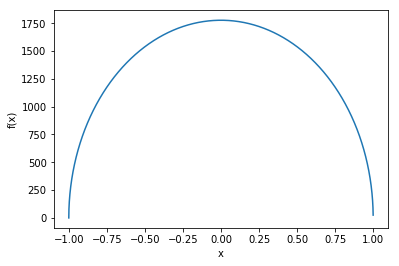

In [78]:
A=1777
a=1
x = np.arange(-1, 1, 0.0001)
y = A * np.sqrt(a - x * x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show() 


Ttest_1sampResult(statistic=-99819.54239236531, pvalue=0.0)


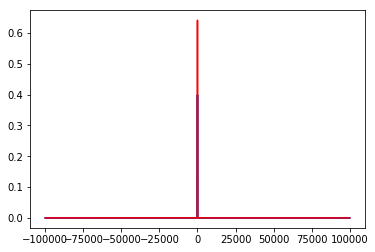

In [79]:
from pathlib import Path
import pylab
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
%matplotlib inline

image_dir_path = Path('./image')
if not image_dir_path.exists():
    image_dir_path.mkdir(parents=True)

sigma=1
mu1=0
mu2=1
x = np.arange(-100000,100000,1)


# x2 = np.arange()
# 平均0、標準偏差１の正規分布から入力データの確率を得ている
y1 = norm.pdf(x=x, loc=mu1, scale=sigma)
y2 = norm.pdf(x=x, loc=mu2, scale=sigma)

# y1 = np.exp(-(x-mu1)**2/(2*sigma))
# print(stats.ttest_1samp(y1,mu1))
# y2 = np.exp(-(x-mu2)**2/(2*sigma))
# print(stats.ttest_1samp(y2,mu2))
y = y1 + y2
print(stats.ttest_1samp(y,(mu1+mu2)/2))

plt.plot(x,y1,'g')
plt.plot(x,y2,'b')
plt.plot(x, y,'r')

# plt.fill_between(x, y, color='b', alpha=0.2)
plt.savefig(image_dir_path.joinpath('norm.png').__str__())
plt.show()
# stats.probplot(y, dist='norm', plot=pylab)

In [80]:
# t検定
stats.ttest_1samp(y1,mu1)

Ttest_1sampResult(statistic=1.8827071378153781, pvalue=0.05974151781306485)

In [81]:
# shapro-wilk
stats.shapiro(y1)

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0003495216369628906, 0.0)

In [82]:
# Anderson-Darling
stats.anderson(y1,dist='norm')

AndersonResult(statistic=77252.2257340469, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [83]:
from statsmodels.formula.api import ols
data = pd.DataFrame({'x':x,'y':y})
model = ols("y ~ x", data).fit()
print(model.summary())
# stats.shapiro(y)
# stats.ttest_1samp(data['y'],0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 1.151e-09
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               1.00
Time:                        12:31:48   Log-Likelihood:             9.3646e+05
No. Observations:              200000   AIC:                        -1.873e+06
Df Residuals:                  199998   BIC:                        -1.873e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       1e-05   5.01e-06      1.996      0.0

In [84]:
print(stats.kstest(y,"norm").pvalue)
print(stats.kstest(y1,"norm").pvalue)
print(stats.kstest(y2,"norm").pvalue)

0.0
0.0
0.0


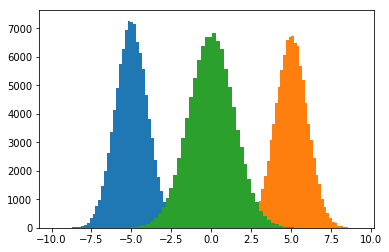

In [85]:
from numpy.random import *
from matplotlib import pyplot as plt
 
# 平均10, 標準偏差5の正規乱数を10万個生成
y1 = normal(-5, 1, 100000)
y2 = normal(5, 1, 100000)
y = y1 + y2

# ヒストグラム
plt.hist(y1, bins=50)
plt.hist(y2, bins=50)
plt.hist(y, bins=50)
plt.show()

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-6.28112635, -6.08435369, -5.89887614, ...,  5.572582  ,
          5.6637235 ,  5.91312863])),
 (1.4153347853683722, 0.0024732051563644344, 0.99999032975019))

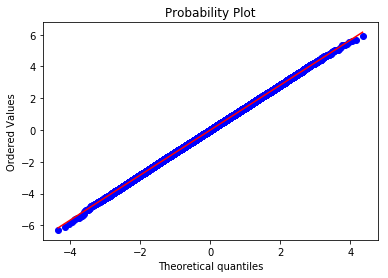

In [86]:
import scipy.stats as stats
import pylab
stats.probplot(y, dist="norm", plot=pylab)

In [87]:
stats.shapiro(y)

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.999975860118866, 0.8041766881942749)

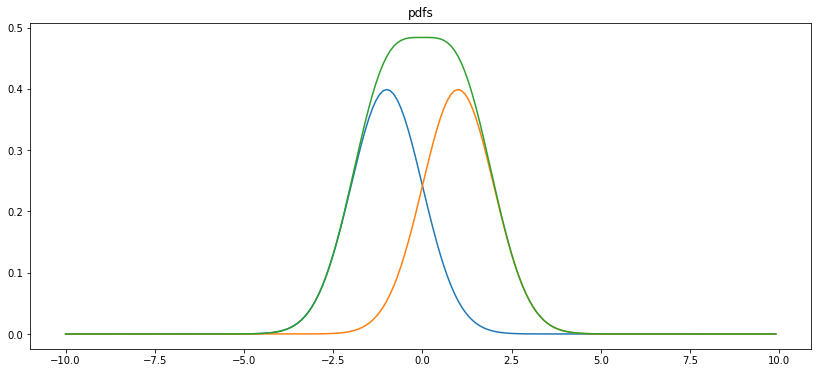

In [88]:
# Parameters
K = 2
n = 50
xx = np.arange(-10,10,0.1)

mu = [-1.0, 1.0]
sigma = [1.0,1.0]
pi = [1.0, 1.0]

# Density function
# pdfs = np.zeros((n, K))
# for k in range(K):
#     pdfs[:, k] = pi[k]*stats.norm.pdf(xx, loc=mu[k], scale=sigma[k])
    
y1 = stats.norm.pdf(xx, loc=mu[0], scale=sigma[0])
y2 = stats.norm.pdf(xx, loc=mu[1], scale=sigma[1])
y = y1 + y2

# =======================================
# Visualization
plt.figure(figsize=(14, 6))
plt.plot(xx, y1)
plt.plot(xx, y2)
plt.plot(xx, y)
plt.title("pdfs")
plt.show()

# plt.figure(figsize=(14, 6))
# plt.stackplot(xx, y1, y2, y)
# plt.title("stacked")
# plt.show()

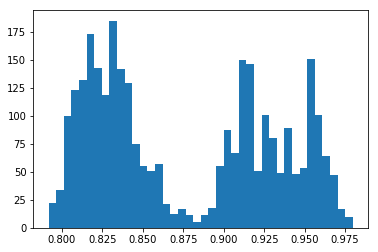

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
 
# 尤度関数
def likelihood(x):
    # 混合ガウス分布
    return np.exp(-(x-0)**2 / 1.0) + np.exp(-(x+0)**2 / 1.0)
 
x = np.random.rand()
 
xs = []
xs.append(x)
 
DELTA_X = 0.002
 
for _ in range(3000):
    # 1/2の確率で
    # 左を遷移方向の候補
    if np.random.rand() < 0.5:
        # 左の方が高い場合 
        if likelihood(xs[-1]-DELTA_X) > likelihood(xs[-1]):
            # 左へ遷移
            xs.append(xs[-1]-DELTA_X)
        # 左の方が低い場合
        else:
            # 左の高さ/現在の高さ の確率で左へ遷移
            if likelihood(xs[-1]-DELTA_X)/likelihood(xs[-1]) > np.random.rand():
                xs.append(xs[-1]-DELTA_X)
            else:
                # 遷移キャンセル
                xs.append(xs[-1])
    # 右を遷移方向の候補
    else:
        # 右の方が高い場合
        if likelihood(xs[-1]+DELTA_X) > likelihood(xs[-1]):
            # 右へ遷移
            xs.append(xs[-1]+DELTA_X)
        else:
            # 左の高さ/現在の高さ の確率で右へ遷移
            if likelihood(xs[-1]+DELTA_X)/likelihood(xs[-1]) > np.random.rand():
                xs.append(xs[-1]+DELTA_X)
            else:
                # 遷移キャンセル
                xs.append(xs[-1])
                 
plt.hist(xs, bins=40)
 
plt.show()
# plt.savefig('gaussian.png')

In [90]:
import scipy.stats as stats
stats.shapiro(xs)

(0.8961511850357056, 4.456269246399351e-41)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
%matplotlib inline
 
# 確率密度関数
def f(x, y):
    return np.sin(x)+np.cos(y)+2
 
# yを固定してxをサンプリング
def sample_x(y):
    x_range = np.arange(-10, 10, 0.02)
    f_vals = np.array([f(x, y) for x in x_range])
    accum_f_vals = np.array([f_vals[:i+1].sum() for i in range(len(f_vals))])
    accum_f_vals /= accum_f_vals[-1]
    rand = np.random.rand()
    return x_range[len(*np.where(accum_f_vals &lt; rand))]
 
# xを固定してyをサンプリング
def sample_y(x):
    y_range = np.arange(-10, 10, 0.02)
    f_vals = np.array([f(x, y) for y in y_range])
    accum_f_vals = np.array([f_vals[:i+1].sum() for i in range(len(f_vals))])
    accum_f_vals /= accum_f_vals[-1]
    rand = np.random.rand()
    return y_range[len(*np.where(accum_f_vals &lt; rand))]
 
xs = []
ys = []
 
x = np.random.rand()
y = np.random.rand()
 
xs.append(5)
ys.append(5)
 
for _ in range(20000):
    # yを固定してxをサンプリング
    xs.append(sample_x(y=ys[-1]))
    # xを固定してyをサンプリング
    ys.append(sample_y(x=xs[-1]))
     
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.hist2d(xs,ys, bins=40)
 
#ax = Axes3D(plt.figure())
#ax.scatter3D(xs, ys, zs, s=3, edgecolor='None')

SyntaxError: invalid syntax (<ipython-input-91-d2542a6555b0>, line 18)

In [92]:
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
# np.random.seed(12345678)
x = stats.norm.rvs(loc=0, scale=1, size=1000)+stats.norm.rvs(loc=0, scale=1, size=1000)
stats.shapiro(x)
    

(0.9986352324485779, 0.6448149681091309)

(array([ 2.,  3.,  3.,  2.,  4.,  3.,  4.,  9., 10., 13.,  9., 13., 16.,
        19., 23., 34., 27., 28., 27., 51., 38., 49., 39., 40., 43., 41.,
        43., 47., 50., 41., 28., 40., 37., 22., 25., 23., 16., 13., 14.,
        12.,  7.,  6.,  5.,  4.,  3.,  5.,  1.,  4.,  2.,  2.]),
 array([-4.01721454, -3.85284978, -3.68848503, -3.52412027, -3.35975552,
        -3.19539077, -3.03102601, -2.86666126, -2.7022965 , -2.53793175,
        -2.37356699, -2.20920224, -2.04483749, -1.88047273, -1.71610798,
        -1.55174322, -1.38737847, -1.22301372, -1.05864896, -0.89428421,
        -0.72991945, -0.5655547 , -0.40118994, -0.23682519, -0.07246044,
         0.09190432,  0.25626907,  0.42063383,  0.58499858,  0.74936333,
         0.91372809,  1.07809284,  1.2424576 ,  1.40682235,  1.57118711,
         1.73555186,  1.89991661,  2.06428137,  2.22864612,  2.39301088,
         2.55737563,  2.72174038,  2.88610514,  3.05046989,  3.21483465,
         3.3791994 ,  3.54356416,  3.70792891,  3.87229366,

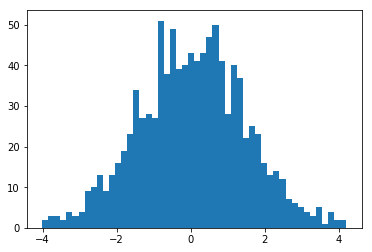

In [93]:
plt.hist(x,bins=50)

In [94]:
def Caruanas(x,y):
    '''
    Caruanas algorithm
    (x,y)の観測値からその正規分布のパラメータを推定
    普通の最小二乗法
    '''

    A = np.zeros((3,3))
    A[0][0] = float(len(x))
    sum_x = np.sum(x)
    A[0][1] = sum_x
    A[1][0] = sum_x
    sum_x2 = np.sum(x**2)
    A[0][2] = sum_x2
    A[1][1] = sum_x2
    A[2][0] = sum_x2
    sum_x3 = np.sum(x**3)
    A[1][2] = sum_x3
    A[2][1] = sum_x3
    A[2][2] = np.sum(x**4)

    b = np.zeros(3)
    b[0] = np.sum(np.log(y))
    b[1] = np.sum(x*np.log(y))
    b[2] = np.sum(x**2 * np.log(y))

    ans = np.linalg.solve(A,b)

    mu = -ans[1]/(2.0*ans[2])
    sigma = np.sqrt(-0.5/(ans[2]))
    A_keisuu = np.exp(ans[0]-ans[1]**2*0.25/(ans[2]))
    return mu,sigma,A_factor

def Guos(x,y):
    '''
    GUOS algorithm
    誤差について1次の項まで考えてる
    '''

    A = np.zeros((3,3))
    b = np.zeros(3)

    A[0][0] = np.sum(y**2)
    xy_2 = np.sum(x*y**2)
    A[0][1] = xy_2
    A[1][0] = xy_2
    x_2y_2 = np.sum((x**2)*(y**2))
    A[0][2] = x_2y_2
    A[1][1] = x_2y_2
    A[2][0] = x_2y_2
    x_3y_2 = np.sum((x**3)*(y**2))
    A[1][2] = x_3y_2
    A[2][1] = x_3y_2
    x_4y_2 = np.sum((x**4)*(y**2))
    A[2][2] = x_4y_2

    b[0] = np.sum((y**2)* np.log(y))
    b[1] = np.sum(x*(y**2)*np.log(y))
    b[2] = np.sum((x**2)*(y**2)*np.log(y))

    ans = np.linalg.solve(A,b)

    mu = -ans[1]/(2.0*ans[2])
    sigma = np.sqrt(-0.5/(ans[2]))
    A_keisuu = np.exp(ans[0]-ans[1]**2*0.25/(ans[2]))
    return mu,sigma,A_factor

def scipy_fit(x_in,y_in):
    '''
    scipyのcurve_fit使う.
    '''
    def gaussian_fit(x,A,mu,sigma):
        return A*np.exp(-(x-mu)**2 / (2.0*sigma**2))

    params,cov = optimize.curve_fit(gaussian_fit,x_in,y_in)
    #params = [A,mu,sigma]なので上の二つと順番が違う

    return params

In [95]:
import numpy as np
a = np.arange(10)


In [96]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
a[1:5]

array([1, 2, 3, 4])

In [98]:
a[2:8:2]

array([2, 4, 6])

In [99]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [100]:
a[:3]

array([0, 1, 2])

In [101]:
a[4:]

array([4, 5, 6, 7, 8, 9])

In [102]:
a[:3],a[3:]

(array([0, 1, 2]), array([3, 4, 5, 6, 7, 8, 9]))

In [103]:
a[::2]

array([0, 2, 4, 6, 8])

In [104]:
a[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
b = np.arange(20).reshape(4,5)

In [106]:
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [107]:
b[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

In [108]:
b[:2,1:]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]])

In [109]:
b[::2,:]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [110]:
b[:,::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19]])

In [111]:
b[:, ::-1]

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10],
       [19, 18, 17, 16, 15]])

In [112]:
b[::-1,::-1]

array([[19, 18, 17, 16, 15],
       [14, 13, 12, 11, 10],
       [ 9,  8,  7,  6,  5],
       [ 4,  3,  2,  1,  0]])

In [113]:
c = np.zeros((3,4,5))

In [114]:
c[::2,::2,::2]=1

In [115]:
c

array([[[1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0.]]])

In [116]:
import numpy as np
import ioFunction_version_4_3 as IO

img = IO.read_raw("E:/itk_hessian/x64/Release/OUTPUT/patch/2.800000/e3/L1.raw", 'short')
np.argmax(img)

20328

In [117]:
max(img)

32764

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as plb
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import ioFunction_version_4_3 as IO

img = IO.read_raw("E:/from_kubo/vector_rotation/x64/Release/output/output_10_13_12.raw", 'double')
img = np.reshape(img, (25,25,25))
print(img.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'E:/from_kubo/vector_rotation/x64/Release/output/output_10_13_12.raw'

In [119]:
profile = img[12:13,:,10:11]
profile = np.reshape(profile,(25,1))
plt.plot(profile)

IndexError: too many indices for array

In [120]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2.0 * sigma ** 2))

def scipy_fit(x_in,y_in):
    '''
    scipyのcurve_fit使う.
    '''
    def gaussian_fit(x,A,mu,sigma):
        return A*np.exp(-(x-mu)**2 / (2.0*sigma**2))

    params,cov = curve_fit(gaussian_fit,x_in,y_in)
    #params = [A,mu,sigma]なので上の二つと順番が違う

    return params

x = np.linspace(0,24,25)
profile = np.reshape(profile,(25))
print(x)
print(profile)
popt = scipy_fit(x,profile)

NameError: name 'profile' is not defined

In [121]:
plt.plot(gauss(x,*popt))

NameError: name 'popt' is not defined

In [122]:
import random 

x,y,z = random.random(), random.random(),random.random()

print(x)
print(y)
print(z)

0.8032702036314094
0.8581046089781827
0.034986343918416596


In [134]:
import pandas as pd
from scipy import stats

a = pd.read_csv("E:/result/hypothesis_test/Gen_test.csv",sep=',', na_values=".", header=None)
a.columns = ['vae', 'pca']
a

,vae,pca
0,0.0651,0.0620
1,0.0621,0.0716
2,0.1030,0.0917
3,0.0617,0.0668
4,0.0722,0.0883
5,0.0742,0.0762
6,0.0692,0.0848
7,0.0639,0.0748
8,0.0709,0.0822
9,0.0789,0.0824


Text(0,0.5,'point')

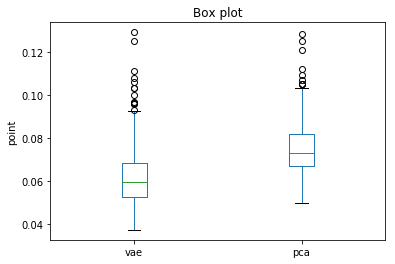

In [135]:
a.plot.box()
plt.title('Box plot')

plt.ylabel('point')

In [136]:
stats.wilcoxon(a['vae'], a['pca'])

WilcoxonResult(statistic=1914.5, pvalue=1.64303796320409e-96)

In [3]:
a = np.arange(100)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [24]:
b = np.ones(2)/2.0
spe_mean = np.convolve(a, b, mode='same')  # 移動平均


In [25]:
spe_mean

array([ 0. ,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
       32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
       43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5,
       54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5,
       65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5,
       76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5,
       87.5, 88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5,
       98.5])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

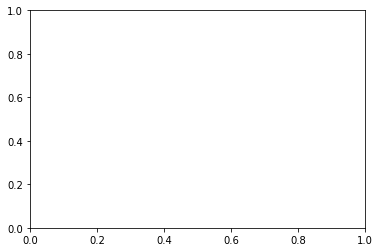

In [19]:
plt.plot(a, spe_mean)
plt.grid()
plt.show()